<a href="https://colab.research.google.com/github/datosagropy/preciosagro/blob/main/preciosagro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#@title   2) Instalar dependencias
#!pip install --quiet pandas geopandas matplotlib plotly seaborn fiona


In [42]:
#@title  3) Imports básicos
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [43]:
#@title  Cargar CSV de microdatos
csv_path = '/content/drive/MyDrive/censoagro/BASE_CAN2022_DATOS_GENERALES_P2.csv'
can = pd.read_csv(csv_path, sep=',')


In [44]:
#@title  Leer shapefile de Paraguay (nivel 2)
shp_path = '/content/drive/MyDrive/censoagro/gadm40_PRY_2.shp'
py = gpd.read_file(shp_path)

# crear código entero DSTO_PROC compatible
py['raw_id2'] = py['ID_2'].astype(str)
py['dstocode'] = (
    py['raw_id2']
    .str.replace(r'^PRY\.', '', regex=True)
    .str.replace(r'_.*$','',    regex=True)
    .str.replace(r'\.','',      regex=True)
    .astype(int)
)
py = py.set_crs(py.crs)  # aseguramos CRS



In [45]:
#@title 6️⃣ Diccionarios de etiquetas

# Departamentos (DPTO_PROC)
departamento_labels = {
    0:  "ASUNCIÓN",
    1:  "CONCEPCIÓN",
    2:  "SAN PEDRO",
    3:  "CORDILLERA",
    4:  "GUAIRÁ",
    5:  "CAAGUAZÚ",
    6:  "CAAZAPÁ",
    7:  "ITAPÚA",
    8:  "MISIONES",
    9:  "PARAGUARÍ",
    10: "ALTO PARANÁ",
    11: "CENTRAL",
    12: "ÑEEMBUCÚ",
    13: "AMAMBAY",
    14: "CANINDEYÚ",
    15: "PRESIDENTE HAYES",
    16: "BOQUERÓN",
    17: "ALTO PARAGUAY"
}

# Distritos (DSTO_PROC)
distrito_labels = {
    0:    "ASUNCIÓN",                              # 0000
    101:  "CONCEPCIÓN",                            # 0101
    102:  "BELÉN",
    103:  "HORQUETA",
    104:  "LORETO",
    105:  "SAN CARLOS DEL APÁ",
    106:  "SAN LÁZARO",
    107:  "YBY YA’Ú",
    108:  "AZOTE’Y",
    109:  "SARGENTO JOSÉ FÉLIX LÓPEZ",
    110:  "SAN ALFREDO",
    111:  "PASO BARRETO",
    112:  "ARROYITO",
    113:  "PASO HORQUETA",
    201:  "SAN PEDRO DEL YCUAMANDYYÚ",            # 0201
    202:  "ANTEQUERA",
    203:  "CHORÉ",
    204:  "GENERAL ELIZARDO AQUINO",
    205:  "ITACURUBÍ DEL ROSARIO",
    206:  "LIMA",
    207:  "NUEVA GERMANIA",
    208:  "SAN ESTANISLAO",
    209:  "SAN PABLO",
    210:  "TACUATÍ",
    211:  "UNIÓN",
    212:  "25 DE DICIEMBRE",
    213:  "VILLA DEL ROSARIO",
    214:  "GENERAL FRANCISCO ISIDORO RESQUÍN",
    215:  "YATAITY DEL NORTE",
    216:  "GUAJAYVÍ",
    217:  "CAPIIBARY",
    218:  "SANTA ROSA DEL AGUARAY",
    219:  "YRYBUCUÁ",
    220:  "LIBERACIÓN",
    221:  "SAN VICENTE PANCHOLO",
    222:  "SAN JOSÉ DEL ROSARIO",
    301:  "CAACUPÉ",                              # 0301
    302:  "ALTOS",
    303:  "ARROYOS Y ESTEROS",
    304:  "ATYRÁ",
    305:  "CARAGUATAY",
    306:  "EMBOSCADA",
    307:  "EUSEBIO AYALA",
    308:  "ISLA PUCÚ",
    309:  "ITACURUBÍ DE LA CORDILLERA",
    310:  "JUAN DE MENA",
    311:  "LOMA GRANDE",
    312:  "MBOCAYATY DEL YHAGUY",
    313:  "NUEVA COLOMBIA",
    314:  "PIRIBEBUY",
    315:  "PRIMERO DE MARZO",
    316:  "SAN BERNARDINO",
    317:  "SANTA ELENA",
    318:  "TOBATÍ",
    319:  "VALENZUELA",
    320:  "SAN JOSÉ OBRERO",
    401:  "VILLARRICA",                           # 0401
    402:  "BORJA",
    403:  "CAPITÁN MAURICIO JOSÉ TROCHE",
    404:  "CORONEL MARTÍNEZ",
    405:  "FÉLIX PÉREZ CARDOZO",
    406:  "GRAL. EUGENIO A. GARAY",
    407:  "INDEPENDENCIA",
    408:  "ITAPÉ",
    409:  "ITURBE",
    410:  "JOSÉ FASSARDI",
    411:  "MBOCAYATY",
    412:  "NATALICIO TALAVERA",
    413:  "ÑUMI",
    414:  "SAN SALVADOR",
    415:  "YATAITY",
    416:  "DOCTOR BOTTRELL",
    417:  "PASO YOBAÍ",
    418:  "TEBICUARÍ",
    501:  "CORONEL OVIEDO",                       # 0501
    502:  "CAAGUAZÚ",
    503:  "CARAYAO",
    504:  "DR. CECILIO BÁEZ",
    505:  "SANTA ROSA DEL MBUTUY",
    506:  "DR. JUAN MANUEL FRUTOS",
    507:  "REPATRIACIÓN",
    508:  "NUEVA LONDRES",
    509:  "SAN JOAQUÍN",
    510:  "SAN JOSÉ DE LOS ARROYOS",
    511:  "YHÚ",
    512:  "DR. J. EULOGIO ESTIGARRIBIA",
    513:  "R.I. 3 CORRALES",
    514:  "RAÚL ARSENIO OVIEDO",
    515:  "JOSÉ DOMINGO OCAMPOS",
    516:  "MARISCAL FRANCISCO SOLANO LÓPEZ",
    517:  "LA PASTORA",
    518:  "3 DE FEBRERO",
    519:  "SIMÓN BOLÍVAR",
    520:  "VAQUERÍA",
    521:  "TEMBIAPORÁ",
    522:  "NUEVA TOLEDO",
    601:  "CAAZAPÁ",                              # 0601
    602:  "ABAÍ",
    603:  "BUENA VISTA",
    604:  "DR. MOISÉS S. BERTONI",
    605:  "GRAL. HIGINIO MORÍNIGO",
    606:  "MACIEL",
    607:  "SAN JUAN NEPOMUCENO",
    608:  "TAVAÍ",
    609:  "YEGROS",
    610:  "YUTY",
    611:  "3 DE MAYO",
    701:  "ENCARNACIÓN",                          # 0701
    702:  "BELLA VISTA",
    703:  "CAMBYRETA",
    704:  "CAPITÁN MEZA",
    705:  "CAPITÁN MIRANDA",
    706:  "NUEVA ALBORADA",
    707:  "CARMEN DEL PARANÁ",
    708:  "CORONEL BOGADO",
    709:  "CARLOS ANTONIO LÓPEZ",
    710:  "NATALIO",
    711:  "FRAM",
    712:  "GENERAL ARTIGAS",
    713:  "GENERAL DELGADO",
    714:  "HOHENAU",
    715:  "JESÚS",
    716:  "JOSÉ LEANDRO OVIEDO",
    717:  "OBLIGADO",
    718:  "MAYOR JULIO DIONISIO OTAÑO",
    719:  "SAN COSME Y DAMIÁN",
    720:  "SAN PEDRO DEL PARANÁ",
    721:  "SAN RAFAEL DEL PARANÁ",
    722:  "TRINIDAD",
    723:  "EDELIRA",
    724:  "TOMÁS ROMERO PEREIRA",
    725:  "ALTO VERÁ",
    726:  "LA PAZ",
    727:  "YATYTAY",
    728:  "SAN JUAN DEL PARANÁ",
    729:  "PIRAPÓ",
    730:  "ITAPÚA POTY",
    801:  "SAN JUAN BAUTISTA DE LAS MISIONES",   # 0801
    802:  "AYOLAS",
    803:  "SAN IGNACIO",
    804:  "SAN MIGUEL",
    805:  "SAN PATRICIO",
    806:  "SANTA MARÍA",
    807:  "SANTA ROSA",
    808:  "SANTIAGO",
    809:  "VILLA FLORIDA",
    810:  "YABEBYRY",
    901:  "PARAGUARÍ",                            # 0901
    902:  "ACAHAY",
    903:  "CAAPUCÚ",
    904:  "CABALLERO",
    905:  "CARAPEGUÁ",
    906:  "ESCOBAR",
    907:  "LA COLMENA",
    908:  "MBUYAPÉY",
    909:  "PIRAYÚ",
    910:  "QUIINDY",
    911:  "QUYQUYHÓ",
    912:  "ROQUE GONZÁLEZ DE SANTA CRUZ",
    913:  "SAPUCAÍ",
    914:  "TEBICUARÍ-MÍ",
    915:  "YAGUARÓN",
    916:  "YBYCUI",
    917:  "YBYTYMÍ",
    918:  "MARÍA ANTONIA",
    1001: "CIUDAD DEL ESTE",                     # 1001
    1002: "PRESIDENTE FRANCO",
    1003: "DOMINGO MARTÍNEZ DE IRALÁ",
    1004: "DR. JUAN LEÓN MALLORQUÍN",
    1005: "HERNANDARIAS",
    1006: "ITAKYRY",
    1007: "JUAN E. O’LEARY",
    1008: "ÑACUNDAY",
    1009: "YGUAZÚ",
    1010: "LOS CEDRALES",
    1011: "MINGA GUAZÚ",
    1012: "SAN CRISTÓBAL",
    1013: "SANTA RITA",
    1014: "NARANJAL",
    1015: "SANTA ROSA DEL MONDAY",
    1016: "MINGA PORÁ",
    1017: "MBARACAYÚ",
    1018: "SAN ALBERTO",
    1019: "IRUÑA",
    1020: "SANTA FE DEL PARANÁ",
    1021: "TAVAPY",
    1022: "DR. RAÚL PEÑA",
    1101: "AREGUÁ",                              # 1101
    1102: "CAPIATÁ",
    1103: "FERNANDO DE LA MORA",
    1104: "GUARAMBARE",
    1105: "ITA",
    1106: "ITAUGUÁ",
    1107: "LAMBARE",
    1108: "LIMPIO",
    1109: "LUQUE",
    1110: "MARIANO ROQUE ALONSO",
    1111: "NUEVA ITALIA",
    1112: "ÑEMBY",
    1113: "SAN ANTONIO",
    1114: "SAN LORENZO",
    1115: "VILLA ELISA",
    1116: "VILLETA",
    1117: "YPACARAÍ",
    1118: "YPANÉ",
    1119: "J. AUGUSTO SALDIVAR",
    1201: "PILAR",                               # 1201
    1202: "ALBERDI",
    1203: "CERRITO",
    1204: "DESMOCHADOS",
    1205: "GRAL. JOSÉ EDUVIGIS DÍAZ",
    1206: "GUAZÚ-CUÁ",
    1207: "HUMAITÁ",
    1208: "ISLA UMBÚ",
    1209: "LAURELES",
    1210: "MAYOR JOSÉ DÉJESUS MARTÍNEZ",
    1211: "PASO DE PATRIA",
    1212: "SAN JUAN BAUTISTA DE ÑEEMBUCÚ",
    1213: "TACUARAS",
    1214: "VILLA FRANCA",
    1215: "VILLA OLIVA",
    1216: "VILLALBÍN",
    1301: "PEDRO JUAN CABALLERO",                # 1301
    1302: "BELLA VISTA",
    1303: "CAPITÁN BADO",
    1304: "ZANJA PYTÁ",
    1305: "KARAPAÍ",
    1306: "CERRO CORÁ",
    1401: "SALTO DEL GUAIRÁ",                   # 1401
    1402: "CORPUS CHRISTI",
    1403: "VILLA CURUGUATY",
    1404: "VILLA YGATIMÍ",
    1405: "ITANARA",
    1406: "YPEJHU",
    1407: "FRANCISCO CABALLERO ÁLVAREZ",
    1408: "KATUETÉ",
    1409: "LA PALOMA DEL ESPÍRITU SANTO",
    1410: "NUEVA ESPERANZA",
    1411: "YASY CAÑY",
    1412: "YBYRAROBANA",
    1413: "YBY PYTÁ",
    1414: "MARACANÁ",
    1415: "PUERTO ADELA",
    1416: "LAUREL",
    1502: "BENJAMÍN ACEVAL",                    # 1502
    1503: "PUERTO PIÑASCO",
    1504: "VILLA HAYES",
    1505: "NANAWA",
    1506: "JOSÉ FALCÓN",
    1507: "TTE. 1RO MANUEL IRALA FERNÁNDEZ",
    1508: "TENIENTE ESTEBÁN MARTÍNEZ",
    1509: "GENERAL JOSÉ MARÍA BRUGUÉZ",
    1510: "CAMPO ACEVAL",
    1602: "MARISCAL JOSÉ FÉLIX ESTIGARRIBIA",   # 1602
    1604: "FILADELFIA",
    1605: "LOMA PLATA",
    1606: "BOQUERÓN",
    1701: "FUERTE OLIMPO",                      # 1701
    1702: "PUERTO CASADO",
    1704: "BAHÍA NEGRA",
    1705: "CARMELO PERALTA"
}



In [46]:
#@title   Etiquetar toda la base

can = can.assign(
    DPTO_PROC = can['DPTO_PROC'].fillna(0).astype(int),
    DSTO_PROC = can['DSTO_PROC'].fillna(0).astype(int)
)
can['departamento']   = can['DPTO_PROC'].map(departamento_labels)
can['distrito']       = can['DSTO_PROC'].map(distrito_labels)


<ipython-input-47-007fc84afb2e>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




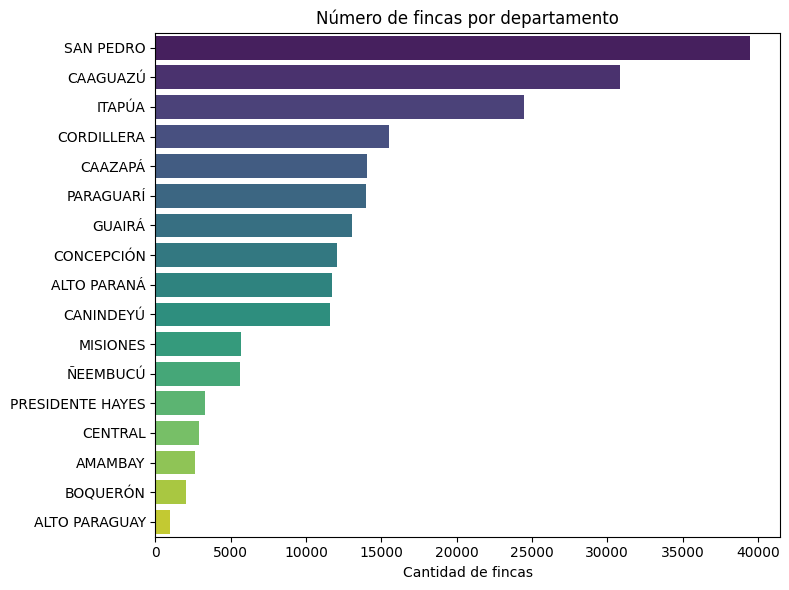

In [47]:
# @title Cantidad de fincas por departamento
tabla_depto = (
  can['departamento']
  .value_counts()
  .rename_axis('Departamento')
  .reset_index(name='n_fincas')
)

plt.figure(figsize=(8,6))
sns.barplot(x='n_fincas', y='Departamento', data=tabla_depto, palette='viridis')
plt.title("Número de fincas por departamento")
plt.xlabel("Cantidad de fincas")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [48]:
# @title Nro de fincas, tamaño medio y mediano

res_depto = (
  can.groupby('departamento')['p8000_1']
     .agg(['count','mean','median'])
     .rename(columns={'count':'n_fincas','mean':'media_ha','median':'mediana_ha'})
     .sort_values('media_ha', ascending=False)
     .reset_index()
)
res_depto


,departamento,n_fincas,media_ha,mediana_ha
0,ALTO PARAGUAY,968,3849.456522,510.0
1,BOQUERÓN,2029,1615.821267,340.0
2,PRESIDENTE HAYES,3273,1554.379523,100.0
3,AMAMBAY,2604,328.252412,15.0
4,ÑEEMBUCÚ,5618,121.061568,15.0
5,MISIONES,5696,95.381071,6.0
6,CONCEPCIÓN,12083,76.851492,8.0
7,ALTO PARANÁ,11725,75.376439,8.0
8,CANINDEYÚ,11570,70.968789,10.0
9,ITAPÚA,24470,38.559849,6.9


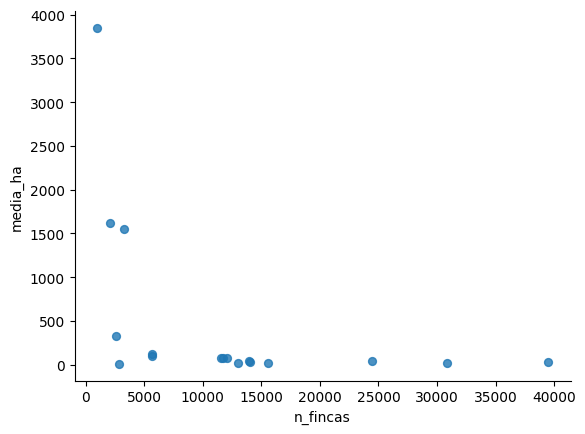

In [49]:
# @title n_fincas vs media_ha

from matplotlib import pyplot as plt
res_depto.plot(kind='scatter', x='n_fincas', y='media_ha', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [50]:
#@title  Figura: N° Fincas vs Media Hectáreas por Departamento"
#prompt: crear la figura con n_fincas vs media_ha donde el color del punto es el departamento a partir de esta tabla, coloca las etiquetas sobre cada punto, y que sea interactivo tipo plotly
# res_depto = (
#   can.groupby('departamento')['p8000_1']
#      .agg(['count','mean','median'])
#      .rename(columns={'count':'n_fincas','mean':'media_ha','median':'mediana_ha'})
#      .sort_values('media_ha', ascending=False)
#      .reset_index()
# )
# res_depto

import plotly.express as px
fig = px.scatter(res_depto,
                 x="n_fincas",
                 y="media_ha",
                 color="departamento",
                 title="N° Fincas vs Media Hectáreas por Departamento")

fig.update_traces(textposition='top center')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


In [51]:
# @title Lista de campos
can.columns


Index(['ID_FCA_ALEATORIO', 'CLASIFICANEW', 'DPTO_PROC', 'DSTO_PROC', 'tipoi',
       'tipofinca', 'p5000', 'menores_total', 'mayores_total', 'p7001_sn',
       ...
       'ACOPLADOS', 'CAMIONES', 'AERONAVES', 'TRACTORGPS', 'SEMBRASENSOR',
       'PULVECONTROL', 'COSECHASENSOR', 'DRONES', 'departamento', 'distrito'],
      dtype='object', length=238)

In [53]:
# @title  2) Crea el % de bosque natural usando p10004:



can['porc_bosque_natural'] = (can['p10004']  / can['p10000_total']) * 100


In [54]:
# prompt: crear la tabla bosques

bosques = can.groupby('distrito')['porc_bosque_natural'].agg(['count', 'mean', 'median']).reset_index()
bosques = bosques.rename(columns={'count': 'n_fincas', 'mean': 'media_porc_bosque', 'median': 'mediana_porc_bosque'})
bosques


,distrito,n_fincas,media_porc_bosque,mediana_porc_bosque
0,25 DE DICIEMBRE,1501,12.882755,0.000000
1,3 DE FEBRERO,1082,4.457104,0.000000
2,3 DE MAYO,1656,10.147018,0.000000
3,ABAÍ,1223,7.071165,0.000000
4,ACAHAY,1115,4.342950,0.000000
...,...,...,...,...
239,YRYBUCUÁ,1867,4.188920,0.000000
240,YUTY,2051,4.631726,0.000000
241,ZANJA PYTÁ,420,9.126314,5.798319
242,ÑACUNDAY,593,12.966439,0.000000


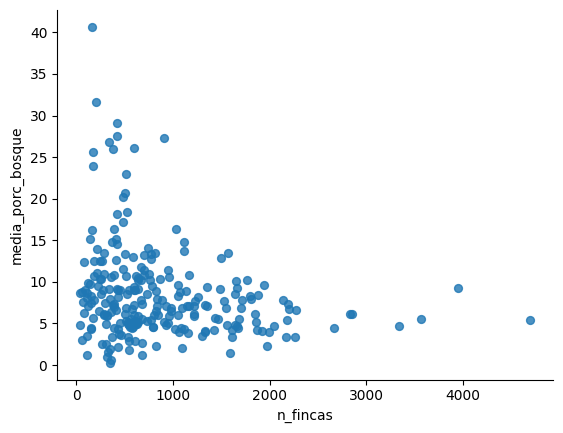

In [55]:
# @title Gráfico: Cantidad de fincas vs media_porc_bosque

from matplotlib import pyplot as plt
bosques.plot(kind='scatter', x='n_fincas', y='media_porc_bosque', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [56]:
#!pip install --quiet gspread gspread-dataframe oauth2client


In [57]:
# @title Autenticar para guardar en google sheet
from google.colab import auth
auth.authenticate_user()


In [58]:
#@title Guardar tabla de resultados
# 1) Asegúrate de instalar gspread y gspread-dataframe
#!pip install --quiet gspread gspread-dataframe google-auth

# 2) Autentícate
from google.colab import auth
auth.authenticate_user()

# 3) Conecta usando google-auth
import gspread
from google.auth import default
from gspread_dataframe import set_with_dataframe

creds, _ = default()          # obtiene credenciales válidas en Colab
gc = gspread.authorize(creds) # autoriza gspread

# 4) Abre la hoja y la pestaña "mapa1"
SPREADSHEET_URL = 'https://docs.google.com/spreadsheets/d/1ejLb7IMT1pYUi3t80mvyUj-wzHN3TTNyP0Ei-hnDvLw/edit'
sh = gc.open_by_url(SPREADSHEET_URL)
ws = sh.worksheet('mapa1')

# 5) Vuelca tu DataFrame 'bosques' (resultado del mapa)
#    Asegúrate de haber corrido antes:
#    bosques = can.groupby('DSTO_PROC')['porc_bosque_natural']...
set_with_dataframe(ws, bosques)

print("✅ La tabla se ha escrito en la pestaña 'mapa1'.")


✅ La tabla se ha escrito en la pestaña 'mapa1'.
